Knn Iris Dataset

In [24]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()

df = iris.frame

In [25]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [26]:
df["sepal_width_iris"] = pd.qcut(df['sepal width (cm)'], 4, retbins=False, labels=[1, 2, 3, 4])
df["sepal_width_iris"]


0      4
1      2
2      3
3      3
4      4
      ..
145    2
146    1
147    2
148    4
149    2
Name: sepal_width_iris, Length: 150, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [27]:
y = df['sepal_width_iris']
X = df.drop(['sepal_width_iris','sepal width (cm)','petal width (cm)','sepal length (cm)','target'], axis = 1)

In [28]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
X_train

array([[-1.39338902],
       [-1.33550342],
       [ 0.74837808],
       [ 0.4010645 ],
       [ 0.51683569],
       [-1.45127462],
       [-1.33550342],
       [-0.06202028],
       [ 0.74837808],
       [ 0.97992047],
       [ 0.3431789 ],
       [ 1.32723405],
       [ 0.2274077 ],
       [ 1.61666204],
       [ 0.4010645 ],
       [-1.39338902],
       [ 1.67454764],
       [ 0.16952211],
       [-1.39338902],
       [-1.45127462],
       [-1.10396103],
       [-0.17779148],
       [ 0.63260689],
       [-1.10396103],
       [-1.27761783],
       [-1.21973223],
       [ 0.2274077 ],
       [-1.33550342],
       [ 0.2274077 ],
       [ 1.67454764],
       [-1.39338902],
       [ 0.2852933 ],
       [ 0.69049248],
       [-1.39338902],
       [ 0.57472129],
       [ 0.74837808],
       [ 0.11163651],
       [ 0.4010645 ],
       [ 0.92203487],
       [ 0.11163651],
       [-1.21973223],
       [-0.29356267],
       [ 0.86414927],
       [-1.39338902],
       [-1.50916022],
       [-0

In [31]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
y_pred = classifier.predict(X_test)

In [33]:
acc =  classifier.score(X_test, y_test)
print(acc)

0.42105263157894735


              precision    recall  f1-score   support

           1       0.40      0.55      0.46        11
           2       0.00      0.00      0.00         7
           3       0.14      0.10      0.12        10
           4       0.60      0.90      0.72        10

    accuracy                           0.42        38
   macro avg       0.29      0.39      0.32        38
weighted avg       0.31      0.42      0.35        38



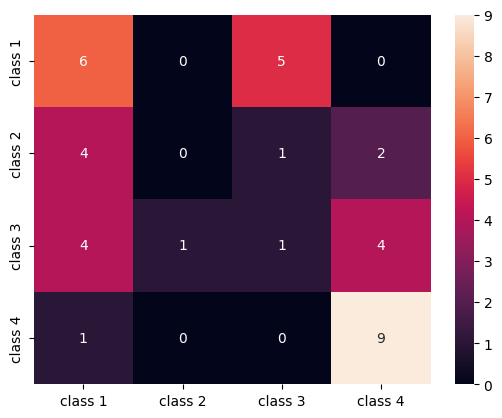

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

classes_names = ['class 1','class 2','class 3','class 4']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

None 0.8133333333333334


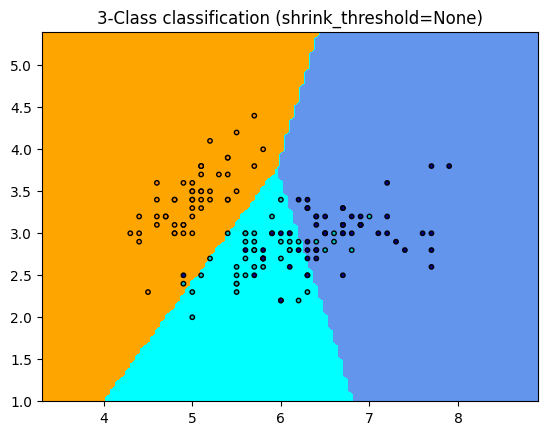

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import NearestCentroid

iris = load_iris()
X = iris.data
y = iris.target
X_2d = X[:, [0, 1]]
y = iris.target


# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ListedColormap(["darkorange", "c", "darkblue"])

for shrinkage in [None]:
    # we create an instance of Nearest Centroid Classifier and fit the data.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X_2d, y)
    y_pred = clf.predict(X_2d)
    print(shrinkage, np.mean(y == y_pred))

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf, X_2d, cmap=cmap_light, ax=ax, response_method="predict"
    )

    # Plot also the training points
    plt.scatter(X_2d[:, 0],X_2d[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=10)
    plt.title("3-Class classification (shrink_threshold=%r)" % shrinkage)
    plt.axis("tight")

plt.show()


In [36]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

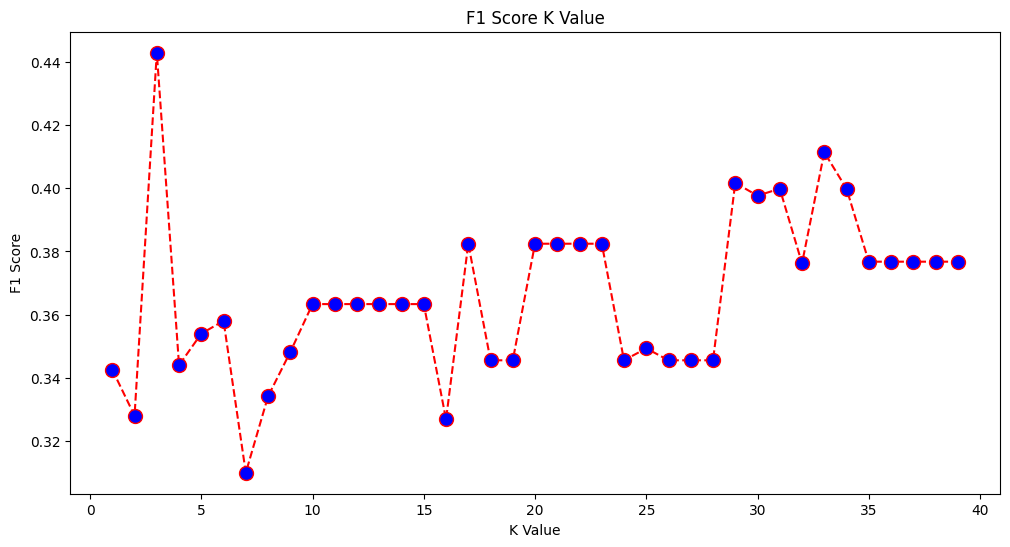

In [37]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [44]:
classifier15 = KNeighborsClassifier(n_neighbors=15)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

           1       0.44      0.36      0.40        11
           2       0.11      0.14      0.12         7
           3       0.20      0.10      0.13        10
           4       0.60      0.90      0.72        10

    accuracy                           0.39        38
   macro avg       0.34      0.38      0.34        38
weighted avg       0.36      0.39      0.36        38



In [39]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors = 5)
nbrs.fit(X_train)
# Distances and indexes of the 5 neighbors 
distances, indexes = nbrs.kneighbors(X_train)

In [40]:
distances[:3], distances.shape

(array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]),
 (112, 5))

In [41]:
indexes[:3], indexes[:3].shape


(array([[94, 15, 58,  0, 18],
        [ 1, 62, 86,  6, 49],
        [ 2, 35, 54,  8, 48]], dtype=int64),
 (3, 5))

Text(0, 0.5, 'Mean Distances')

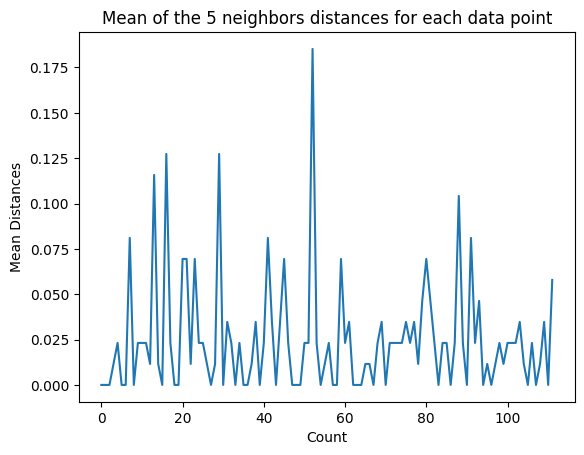

In [42]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 5 neighbors distances for each data point')
plt.xlabel('Count')
plt.ylabel('Mean Distances')

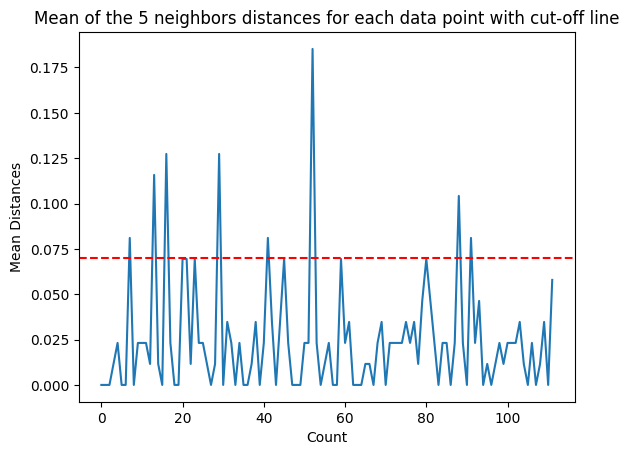

In [21]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 5 neighbors distances for each data point with cut-off line')
plt.xlabel('Count')
plt.ylabel('Mean Distances')
plt.axhline(y = 0.07, color = 'r', linestyle = '--')

In [22]:
import numpy as np

# Visually determine cutoff values > 3
outlier_index = np.where(dist_means > 0.07)
outlier_index


(array([ 7, 13, 16, 29, 41, 52, 88, 91], dtype=int64),)

In [23]:
outlier_values = df.iloc[outlier_index]
outlier_values

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal_width_iris
7,5.0,3.4,1.5,0.2,0,4
13,4.3,3.0,1.1,0.1,0,2
16,5.4,3.9,1.3,0.4,0,4
29,4.7,3.2,1.6,0.2,0,3
41,4.5,2.3,1.3,0.3,0,1
52,6.9,3.1,4.9,1.5,1,3
88,5.6,3.0,4.1,1.3,1,2
91,6.1,3.0,4.6,1.4,1,2
